<a href="https://colab.research.google.com/github/Debasmita-Pal/Code_With_Python/blob/main/20MAI0018_DL_LAB_FAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

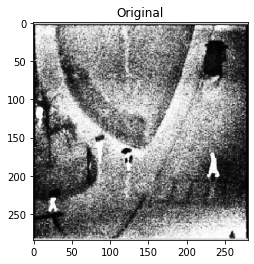

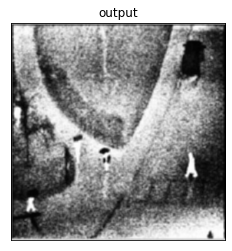

Entropy: 7.944922986809891


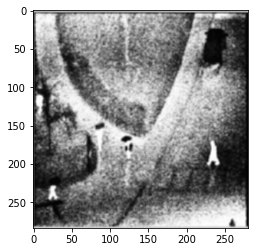

In [1]:
#  REG NO: 20MAI0018



# Box_filter of 3*3 size used to blur the 1st image and calculate entropy
import cv2
import numpy as np
from matplotlib import pyplot as plt
import skimage.measure

img = cv2.imread('/content/drive/My Drive/p1.jpg')
kernel=np.ones((3,3),np.float32)/9              
dst=cv2.filter2D(img,-1,kernel)

plt.imshow(img),plt.title('Original')
plt.show()
cv2.imwrite('orig.png', img)
plt.xticks([]), plt.yticks([])
plt.imshow(dst),plt.title('output')
plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('boxfil.png', dst)

plt.imshow(dst)
entropy = skimage.measure.shannon_entropy(dst)
print("Entropy:",entropy)

In [12]:
#Calculate and compare PSNR values of both images (original & compressed)

from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(img, dst):
    mse = np.mean((img - dst) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
  
def main():
     value = PSNR(img, dst)
     print(f"PSNR value is {value} dB")
       
if __name__ == "__main__":
    main()

PSNR value is 32.690147779103974 dB


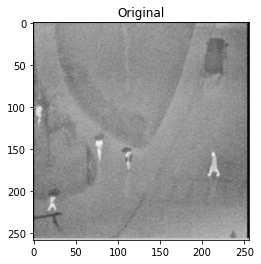

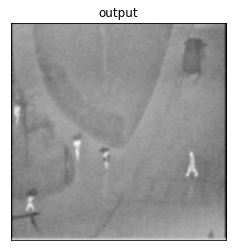

Entropy: 5.854627987812577


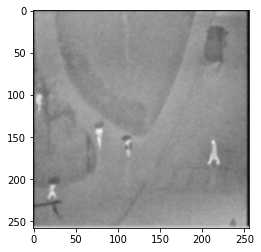

In [2]:
# Box_filter of 3*3 size used to blur the 2nd image and calculate entropy

img = cv2.imread('/content/drive/My Drive/p2.jpg')
kernel=np.ones((3,3),np.float32)/9              
dst=cv2.filter2D(img,-1,kernel)

plt.imshow(img),plt.title('Original')
plt.show()
cv2.imwrite('orig.png', img)
plt.xticks([]), plt.yticks([])
plt.imshow(dst),plt.title('output')
plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('boxfil.png', dst)

plt.imshow(dst)
entropy = skimage.measure.shannon_entropy(dst)
print("Entropy:",entropy)

In [13]:
#Calculate and compare PSNR values of both images (original & compressed)


from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(img, dst):
    mse = np.mean((img - dst) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
  
def main():
     value = PSNR(img, dst)
     print(f"PSNR value is {value} dB")
       
if __name__ == "__main__":
    main()

PSNR value is 32.690147779103974 dB


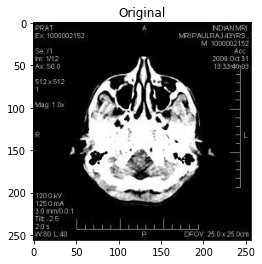

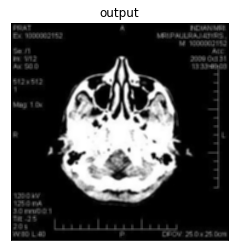

Entropy: 4.82083035621616


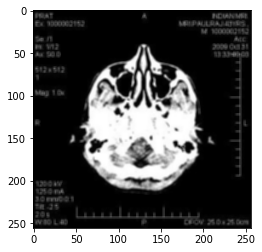

In [3]:
# Box_filter of 3*3 size used to blur the 3rd image and calculate entropy

img = cv2.imread('/content/drive/My Drive/p3.jpg')
kernel=np.ones((3,3),np.float32)/9              
dst=cv2.filter2D(img,-1,kernel)

plt.imshow(img),plt.title('Original')
plt.show()
cv2.imwrite('orig.png', img)
plt.xticks([]), plt.yticks([])
plt.imshow(dst),plt.title('output')
plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('boxfil.png', dst)

plt.imshow(dst)
entropy = skimage.measure.shannon_entropy(dst)
print("Entropy:",entropy)

In [14]:
#Calculate and compare PSNR values of both images (original & compressed)


from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(img, dst):
    mse = np.mean((img - dst) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
  
def main():
     value = PSNR(img, dst)
     print(f"PSNR value is {value} dB")
       
if __name__ == "__main__":
    main()

PSNR value is 32.690147779103974 dB


[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. 205. ... 216.   0.   0.]
 ...
 [  0.   0. 209. ... 202.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


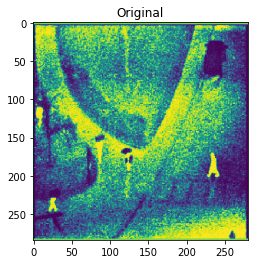

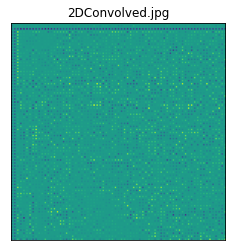

Entropy: 3.32750218492643


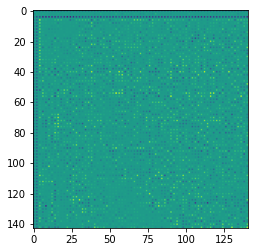

In [5]:
#zero padding and stride=2 for 1st image
import cv2 
import numpy as np
import skimage.measure

def processImage(image): 
  image = cv2.imread('/content/drive/My Drive/p1.jpg') 
  image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY) 
  return image

def convolve2D(image, kernel, padding=0, strides=2):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

if __name__ == '__main__':
    # Grayscale Image
    image = processImage('/content/drive/My Drive/p1.jpg')

    # Edge Detection Kernel
    kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    

    # Convolve and Save Output
    output = convolve2D(image, kernel, padding=2)
    cv2.imwrite('2DConvolved.jpg', output)   
plt.imshow(image),plt.title('Original')
plt.show()
cv2.imwrite('orig.png', image)
plt.xticks([]), plt.yticks([])
plt.imshow(output),plt.title('2DConvolved.jpg')
plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('2DConvolved.jpg', output)  

plt.imshow(output)
entropy = skimage.measure.shannon_entropy(output)
print("Entropy:",entropy)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   1. ...  15.   0.   0.]
 ...
 [  0.   0. 204. ... 204.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


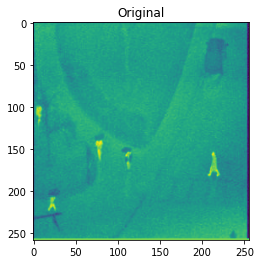

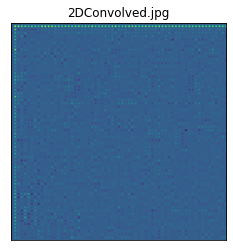

Entropy: 2.6099494773085476


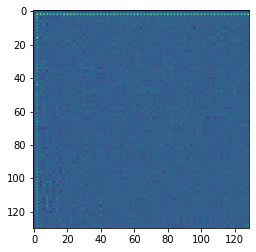

In [6]:
#zero padding and stride=2 for 2nd image
import cv2 
import numpy as np
import skimage.measure

def processImage(image): 
  image = cv2.imread('/content/drive/My Drive/p2.jpg') 
  image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY) 
  return image

def convolve2D(image, kernel, padding=0, strides=2):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

if __name__ == '__main__':
    # Grayscale Image
    image = processImage('/content/drive/My Drive/p2.jpg')

    # Edge Detection Kernel
    kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    

    # Convolve and Save Output
    output = convolve2D(image, kernel, padding=2)
    cv2.imwrite('2DConvolved.jpg', output)   
plt.imshow(image),plt.title('Original')
plt.show()
cv2.imwrite('orig.png', image)
plt.xticks([]), plt.yticks([])
plt.imshow(output),plt.title('2DConvolved.jpg')
plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('2DConvolved.jpg', output)  

plt.imshow(output)
entropy = skimage.measure.shannon_entropy(output)
print("Entropy:",entropy)

In [16]:
#Calculate and compare PSNR values of both images (original & compressed)


from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(imgage, output):
    mse = np.mean((imgage - output) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
  
def main():
     value = PSNR(img, dst)
     print(f"PSNR value is {value} dB")
       
if __name__ == "__main__":
    main()

PSNR value is 32.690147779103974 dB


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 7. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


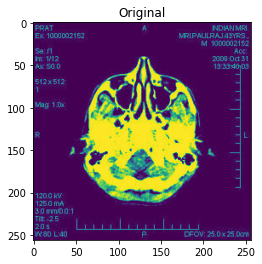

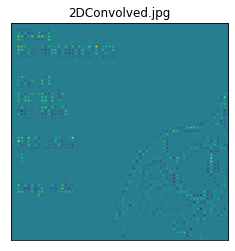

Entropy: 1.7234821858623923


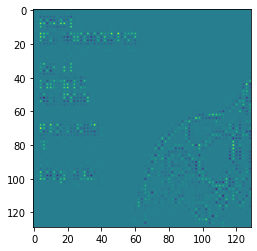

In [7]:
#zero padding and stride=2 for 3rd image
import cv2 
import numpy as np
import skimage.measure

def processImage(image): 
  image = cv2.imread('/content/drive/My Drive/p3.jpg') 
  image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY) 
  return image

def convolve2D(image, kernel, padding=0, strides=2):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

if __name__ == '__main__':
    # Grayscale Image
    image = processImage('/content/drive/My Drive/p3.jpg')

    # Edge Detection Kernel
    kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    

    # Convolve and Save Output
    output = convolve2D(image, kernel, padding=2)
    cv2.imwrite('2DConvolved.jpg', output)   
plt.imshow(image),plt.title('Original')
plt.show()
cv2.imwrite('orig.png', image)
plt.xticks([]), plt.yticks([])
plt.imshow(output),plt.title('2DConvolved.jpg')
plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('2DConvolved.jpg', output)  

plt.imshow(output)
entropy = skimage.measure.shannon_entropy(output)
print("Entropy:",entropy)